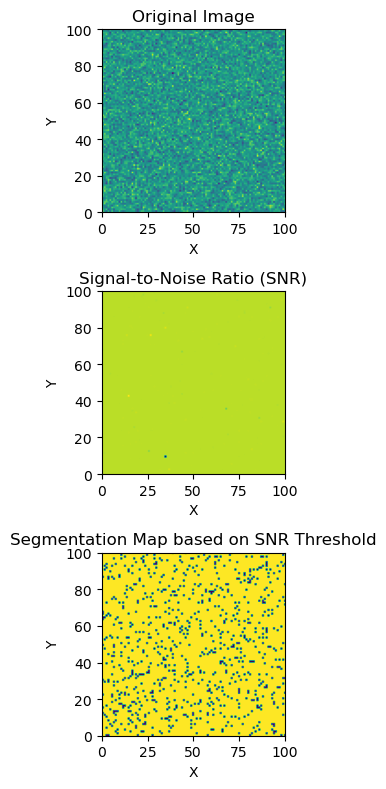

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate a synthetic 2D image (replace this with your actual image data)
image_size = (100, 100)
intensity = -0.01 * (np.linspace(0, 1, image_size[1]) - 0.5)**2 + 0.5 * np.random.normal(size=image_size)
noise = 0.05 * np.random.normal(size=image_size)
image = intensity + noise

# Calculate SNR
snr = intensity / noise

# Threshold for SNR
snr_threshold = 3

# Reshape the arrays for clustering
reshaped_snr = snr.reshape(-1, 1)
reshaped_coords = np.column_stack(np.unravel_index(np.arange(image_size[0] * image_size[1]), image_size))

# Perform clustering using DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)  # Adjust parameters as needed
labels = dbscan.fit_predict(reshaped_snr)

# Create a segmentation map based on identified clusters
segmentation_map = np.zeros_like(snr, dtype=int)
for label_id in np.unique(labels):
    cluster_mask = (labels == label_id)
    if np.sum(cluster_mask) >= 10:  # Minimum number of pixels for an object
        segmentation_map[reshaped_coords[cluster_mask, 0], reshaped_coords[cluster_mask, 1]] = label_id + 1

# Plot the original image, SNR, and segmentation map
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.imshow(image, cmap='viridis', extent=[0, image_size[1], 0, image_size[0]])
plt.title('Original Image')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(3, 1, 2)
plt.imshow(snr, cmap='viridis', extent=[0, image_size[1], 0, image_size[0]])
plt.title('Signal-to-Noise Ratio (SNR)')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(3, 1, 3)
plt.imshow(segmentation_map, cmap='viridis', extent=[0, image_size[1], 0, image_size[0]])
plt.title('Segmentation Map based on SNR Threshold')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()


